## 1절. 분류분석 개요

- 데이터 속성을 활용하여 데이터에 대한 분류 기준을 수립하는 과정
- 분류 분석은 지도학습이며 판별분석 범주에 포함함.
- 활용분야 다양함 : 고객의 등급 변동예측, 휴먼 고객 예측, 상품 구매 예측(개인화된 상품추천) 등

- 인공신경망의 단점이 있었음
    - 과적합 
    - 로컬 미니멈 : 지역적으로 가장 작다고 생각하는 애에서 멈춤 . 그래프를 생각하기 
    - cpu 가 너무 많이 듦
- 그래서 다른 분류를 사용함

## 2절. 분류용 예제 데이터 셋
- sklearn 안에는 datasets 이 있기도 3절에 보면 make 함수로, 내가 직접 만들어서 사용할 수 도 있다.

### 2.1. iris 데이터셋

In [1]:
from sklearn import datasets
iris = datasets.load_iris()  # sklearn 에서 불러오는것은 딕셔너리 형태로 불러와짐 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
import pandas as pd
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y= pd.DataFrame(iris["target_names"][iris["target"]],columns=["species"])
# 위의 구문은 잘알아두기, 이렇게 하면 1,2,3 을 이름으로 바꿔서 출력되게됨. 

iris_df= pd.concat([x,y],axis = 1)

### 2.2. wine 데이터 셋

In [3]:
from sklearn.datasets import load_wine


### 2.3. breast cancer 유방암 진단 데이터 셋

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### 2.4. digits (숫자 필기체 이미지) 데이터 셋

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)


# Attribute Information: 8x8  << 이정도는 작은 것, 100 X 100 정도는 있어야함. 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 3절. 분류용 가상 데이터 셋
- 내가 직접 만들어서 쓰는 데이터 셋을 의미한다. 
### 3.1. make_classification()

- make_classification() 함수를 이용해 분류용 가상 데이터를 만들기. 

In [6]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                          n_clusters_per_class=1,n_classes=3)

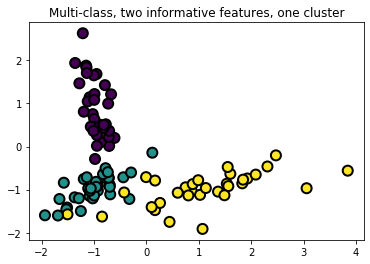

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Multi-class, two informative features, one cluster")
plt.scatter(X[:,0],X[:,1],marker="o",
            c=y, # 컬러를 클래스를 이용해서 하는 것. 
            s=100, # 원의 크기를 나타냄 
            edgecolor="k",linewidth=2)
plt.show()

- 항상 같은 데이터 셋이 만들어지도록 seed를 지정함. 

In [8]:
X,y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                          n_clusters_per_class=1,n_classes=3, random_state=1)

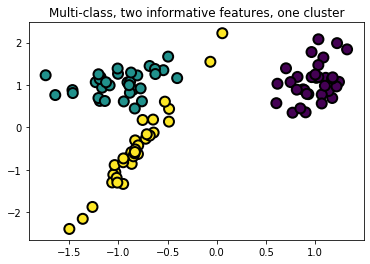

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Multi-class, two informative features, one cluster")
plt.scatter(X[:,0],X[:,1],marker="o",c=y,s=100,edgecolor="k",linewidth=2)
plt.show()

### 3.2. make_blobs()


- make_blobs 함수를 이용해 분류용 가상 데이터를 만들기

In [10]:
from sklearn.datasets import make_blobs
blobs_x, blobs_y = make_blobs(n_features=2, centers=3)

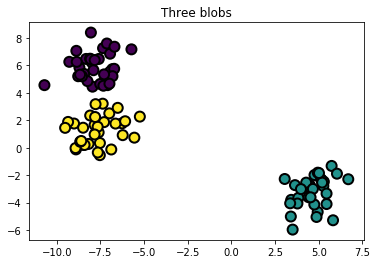

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Three blobs")
plt.scatter(blobs_x[:,0],blobs_x[:,1],marker="o",c=blobs_y,s=100,edgecolor="k",linewidth=2)
plt.show()

### 책이랑 다르게 여러개가 뭉쳐나옴.. 질문하기 

### 3.3. make_gaussian_quantiles()

- 군집분석의 단점이 있음. 그걸 해결하는 방법으로 군의 갯수를 늘리는 것이 있음. 
- 군집분석을 할때 일부로, 홀 모양으로 만든 경우가 있는데, 구형이 아닌 데이터 셋을 만들수 있는데,
- 그게 아니면  가우시안 분포를 따르는 애를 이요해서 만들 수있음. 
- 특정 클래스를 가지는 애는 밖에 아니면 안에해서 만들 수 있음. 

In [62]:
from sklearn.datasets import make_gaussian_quantiles
gau_x, gau_y = make_gaussian_quantiles(n_features=2, n_classes=3, random_state=0)

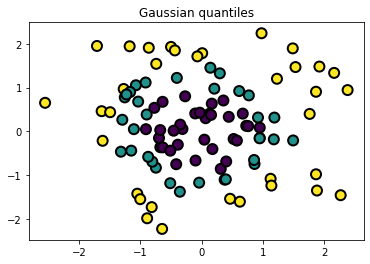

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Gaussian quantiles")
plt.scatter(gau_x[:,0],gau_x[:,1],marker="o",c=gau_y,s=100,edgecolor="k",linewidth=2)
plt.show()

<br>

## 4절. 분류분석 모형
-  독립변수 값이 주어졌을 때 , 그 독립변수 값과 가장 연관성이 큰 종속변수의 클래스(카테고리)를 계산하는 문제
- 분류문제는 선택해야 할 클래스가 미리 주어졌다는 것이 군집과 다름


### 4.1. 분류분석 모형의 종류 
- 분류 모델을 해결하는 방법은 크게 판별함수 모형과 확률적 영역으로 나눌 수 있음.   
    - 확률적 모형 : 주어진 데이터에 대해 각 클래스가 정답일 조건부 확률을 계산하는 모형 
                    조건부확률을 계산하는 법이 2가지가 있는데, 그것에 따라서 아래처럼 나뉨
        - 확률적 판별 : 조건부 확률을 계산하는 방법에 따라 직접 조건부 확률 함수를 추정하는 것
        - 확률적 생성 : 확률적 판별 모형과 `베이즈 정리`를 사용하는 확률적 생성모형으로 나뉨
    - 판별함수모형 : 주어진 데이터를 클래스에 따라 서로 다른 영역으로 나누는 `경계면을 찾은 후` 그 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산하는 판별함수를 이용하는 모형 ex, 퍼셉트론 서포트 벡터머신, 인공신경망 
- 퍼셉트론, 서포트 벡터 머신, 신경망, linear/Quadratic / 나이브 베이지안/ 로지스틱 회귀/ 의사결정 나무 


- 확률적 모형과 판별함수 모형이 조금 다름 그것을 구분하기! 

### 4.2. 확률적 모형
- 조건부확률을 계산하는 방법
    - 생성모형 : 베이즈정리 이용
    - 판별 모형 : 조건부 확률 이용
- predict_proba() : 조건확률을 계산하는 함수
- predict_log_proba() : 조건부확률의 로그값을 계산하는 함수 

### 4.3. 확률적 생성모형

#### 1) QDA (이차판별분석) 
: QDA 는 `조건부 확률 기반` 생성모형중 하나 

- QDA 를 설명하기 위해 임의의 데이터를 만들기
- 클래스를 분류하고 그걸 기반으로 뭐로 분류되었는지 알려주는 것. 

In [14]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                          n_clusters_per_class=1,n_classes=2, random_state=9)

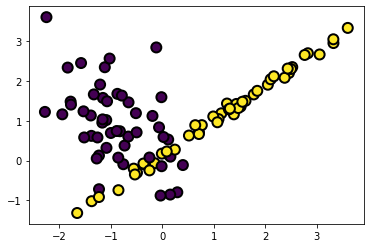

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("")
plt.scatter(X[:,0],X[:,1],marker="o",c=y,s=100, edgecolor="k",linewidth=2)
plt.show()

- 이 데이터는 완벽한 대칭이 아니므로 예제를 설명하기 위해서 대칭구조가 되도록 데이터를 수정함.
- y값이 1인 데이터들을 y값이 0 인 데이터들의 값을 반대 부호로 갖도록 할당함. 
- 대칭이 된 데이터를 이용해서 산점도 그리기

In [16]:
X[y==1,:] = -(X[y==0,:])

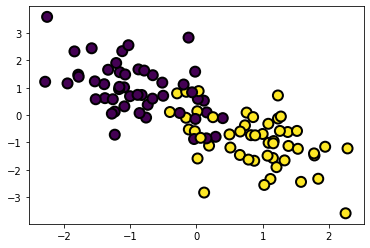

In [17]:
plt.scatter(X[:,0],X[:,1],marker="o",c=y,s=100, edgecolor="k",linewidth=2)
plt.show()

- QDA 모형을 만듦

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

- predict_proba() 함수를 이용해 주어진 위치의 데이터가 각 클래스에 속할 확률을 구한 후 그래프로 표시

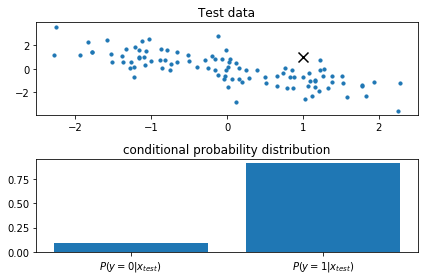

In [19]:
x = [[1,1]]
p = model.predict_proba(x)[0]#x 가 0,0 일때의 확률 
plt.subplot(211)
plt.scatter(X.T[0], X.T[1],s = 10)
plt.scatter(x[0][0], x[0][1], c="k", s =100, marker="x")
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$","$P(y=1|x_{test})$"])# 앞에 $ 를 붙이면 수식이 올수 있음 
plt.tight_layout()
plt.show()

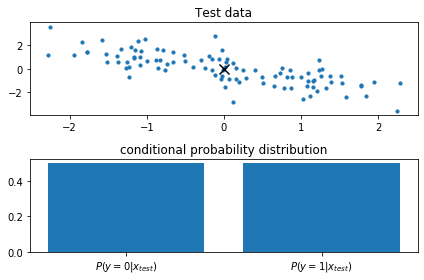

In [20]:
x = [[0,0]]
p = model.predict_proba(x)[0]
plt.subplot(211)
plt.scatter(X.T[0], X.T[1],s = 10)
plt.scatter(x[0][0], x[0][1], c="k", s =100, marker="x")
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$","$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

- QDA모형을 이용해 분류 예측한 데이터의 클래스를 산점도로 나타냄 


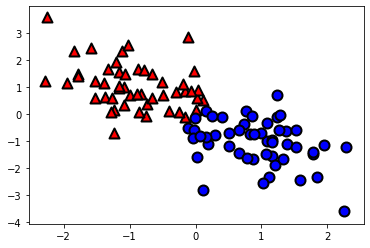

In [21]:
h =  model.predict(X)
plt.scatter(X[h==0, 0],X[h==0, 1], c="r", s =100, marker="^", edgecolors="k", linewidths=2)
plt.scatter(X[h==1, 0],X[h==1, 1], c="b", s =100, marker="o", edgecolors="k", linewidths=2)
plt.show()

- 만일 테스트 데이터가 y=0 인 클래스에 더 가까우면 P(y=0|x_test)가 0.5보다 더 커짐

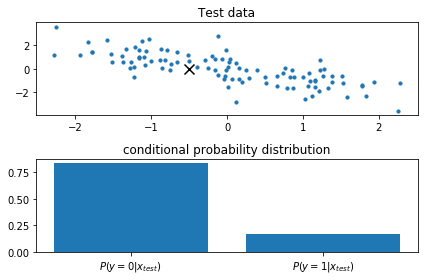

In [22]:
x = [[-0.5,0]]
p = model.predict_proba(x)[0]
plt.subplot(211)
plt.scatter(X.T[0], X.T[1],s = 10)
plt.scatter(x[0][0], x[0][1], c="k", s =100, marker="x")
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$","$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

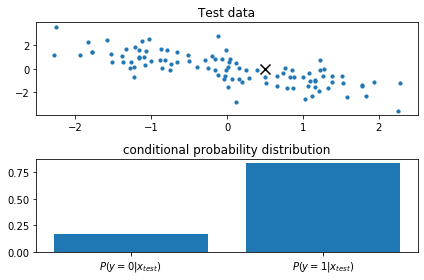

In [23]:
x = [[0.5,0]]
p = model.predict_proba(x)[0]
plt.subplot(211)
plt.scatter(X.T[0], X.T[1],s = 10)
plt.scatter(x[0][0], x[0][1], c="k", s =100, marker="x")
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$","$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

<br>

#### 2) 나이브 베이지안 모델 - MultinomialNB
: 조건부 확률 모형의 일종임. 
- GaussianNB: 정규분포 나이브베이즈
- BernoulliNB: 베르누이분포 나이브베이즈
- MultinomialNB: 다항분포 나이브베이즈

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:,:-1]
y = iris.species

- 모형을 만들고 클래스를 예측함

In [3]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
test_x = [[5.0, 3.4, 1.2, 0.25]] # 임의의 값을 두고 한것. 이 값을 가지고 예측
model.predict(test_x)

array(['setosa'], dtype='<U10')

- 나이브 베이지안 모형으로 첫번째 데이터가 3개의 카테고리에 속할 확률을 각각 계산해 막대그래프로 표시한것. 위쪽 막대그래프는 확률값이고 아래쪽 막대그래프는 로그 변환한 값임.

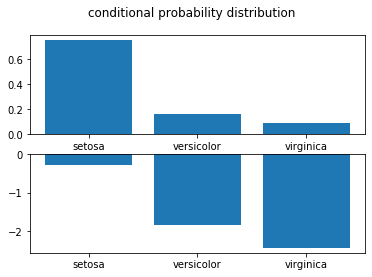

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_x)[0])
plt.xticks(model.classes_)


plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_x)[0])
plt.xticks(model.classes_)
plt.suptitle("conditional probability distribution")
plt.show()

### 4.4. 확률적 판별 모형 

- QDA 와 나이브 베이지안 방법은 베이즈 정리를 사용하는 조건부 확률기반 생성 모형
- 확률론적 판별 모형 : 조건부 확률 P(y=1|x) 가 x 에 대한 함수로 표시될수 있다고 가정하고 그 함수를 직접 찾아내는 방법
    - 로지스틱 회귀
    - 의사결정 나무
    

#### 1) 로지스틱 회귀 모형
- 확률론적 판별 모형 .
- 로지스틱 회귀를 이용해 모형을 만들고 분류 예측

In [30]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, n_informative=1, n_redundant=0,
                          n_clusters_per_class=1,random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)

In [32]:
import numpy as np
xx = np.linspace(-3,3,100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:,1]

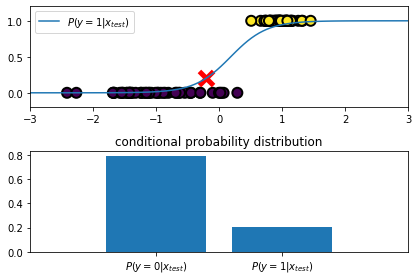

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


X_test = [[-0.2]]
plt.subplot(211)
plt.plot(xx,prob)
plt.scatter(X,y, c=y, s =100, marker="o",edgecolors="k", linewidths=2)
plt.scatter(X_test[0], model.predict_proba(X_test)[0][1:], marker ='x', s= 200, c="r", lw=5 )
plt.xlim(-3,3)  # 축의 한계를 지정해줌 
plt.ylim(-.2,1.2)
plt.legend(["$P(y=1|x_{test})$"])

plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X_test)[0])
plt.xlim(-1,2)  # 축의 한계를 지정해줌 
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_,["$P(y=0|x_{test})$","$P(y=1|x_{test})$"])
plt.title("conditional probability distribution")
plt.tight_layout()
plt.show()


# 데이터 모양이 시그모이드 와 비슷

#### 2) 의사결정나무 모형 

- 디시전 트리로 예측하는 것은 별로... 중요하지 않다
-  그것 보다 어떤 것이 더 큰 영향을 주는지가 중요함 
- 샘플의 갯수가 많은 것만 의미가 있음. 갯수가 작은것은 의미가 없음 
- 변수가 가지는 범위를 아는것은 의사결정나무이다.
- 다른, 주성분 분석이나 다중공성성 등을 보는것은 변.수.만 보는 것인데,
- 의사셜정나무는 가지는범위도 알수 있기때문에, 잘알아두어야한다. 



* 분류규칙 정하기
    * 부모노드와 자식노드간의 엔트로피를 가장 낮게 만드는 최상의 독립변수와 기준값 갖는 것
    * 정보획득량 : 기준을 정량화한 것 ,  
    X라는 조건에 의해 확률변수 Y의 엔트로피가 얼마나 감소했는가를 나타냄 (큰게좋은것)
    * Y의 엔트로피에서 X에 대한 조건부 엔트로피를 뺀 값으로 정의
* 지니지수? : 
    * 지니지수가 낮을때 노드를 찾는 경우가 있으므로 **지니지수** 중요
    * 영역내에 특정 클래스에 속하는 관측치들의 비율을 제외한 값
* 엔트로피 지수? : 
    * 엔트로피가 낮아지면 정보획득량이 높아짐
* 미래예측 뿐만 아니라 종속변수에 영향을 주는 요인을 찾는다.

- 의사 결정 나무 모형을 만듦

In [43]:
#  target 은 숫자로 정보를 가지고 있어서 seaborn 이아니라 sklearn 으로 불러옴 

from sklearn.datasets import load_iris


data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]

- max_depth = 1 로 설정했기 때문에, 모형의 평가 결과가 그리 좋지 않음.

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',
 max_depth=1, random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

- 의사결정나무 모형을 사용하는 이유중 하나는 트리모형을 시각화 할 수 있음'
-  draw_decision_tree 함수는 의사결정나무의 의사결정 과정의 세부적인 내역을 트리 모양으로 보여주고 plot_decision_regions 함수는 이러한 의사결정에 의해 데이터의영역이 어떻게 나뉘어졌는지를 시각화합니다.

In [45]:
import io
from sklearn.tree import export_graphviz
# conda install graphviz
import pydot # pip install pydot
from IPython.core.display import Image

In [46]:
def draw_decision_tree(model, feature_names=feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

        plt.xlabel(data.feature_names[2])
        plt.ylabel(data.feature_names[3])
        plt.legend(loc='upper left')
        plt.title(title)
    
    return Z


- depth(혹은 차수)는 자손의 깊이를 말하는 것
- 맨 위에 있는 것은 루트 노드라고 함. 
- 자식 노드
- depth가 너무 많으면, 오버피팅이일어날수도있음

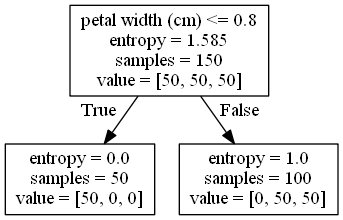

In [48]:
draw_decision_tree(dt_model, feature_names=data.feature_names[2:])

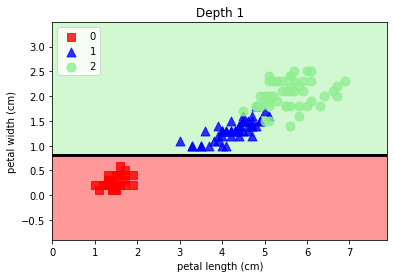

In [49]:
plot_decision_regions(X, y, dt_model, "Depth 1")
plt.show()

- depth를 더 깊게 해서 모형을 만든 후 시각화

In [55]:
dt_model5 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

- 이 트리를 보고 적당한 로드를 내가 선택함. 


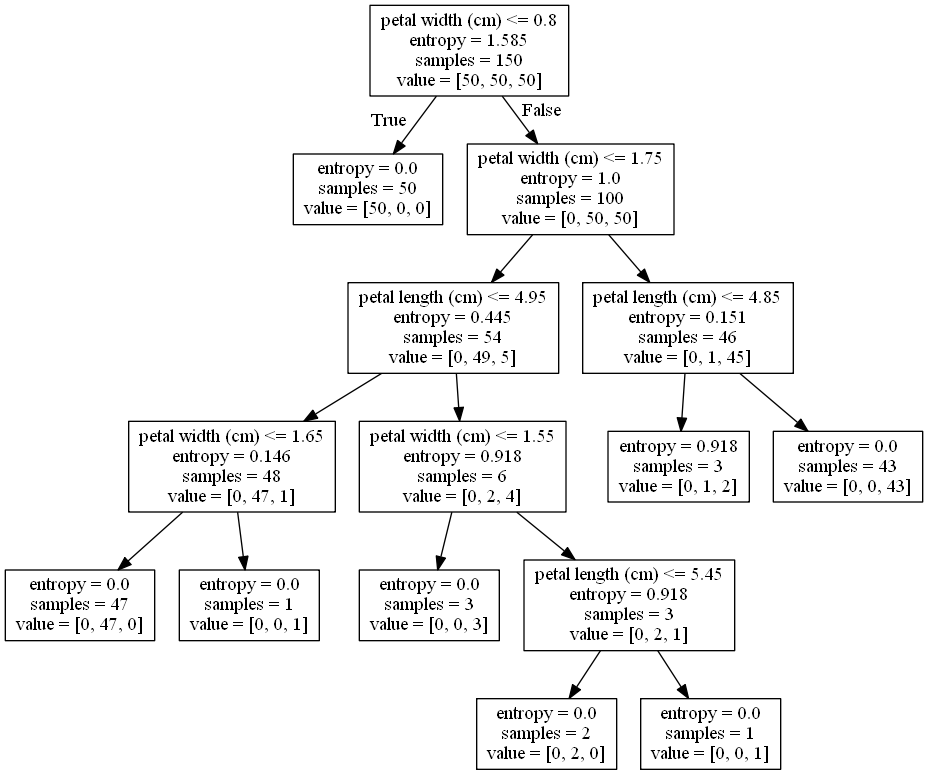

In [51]:
draw_decision_tree(dt_model5, feature_names=data.feature_names[2:])

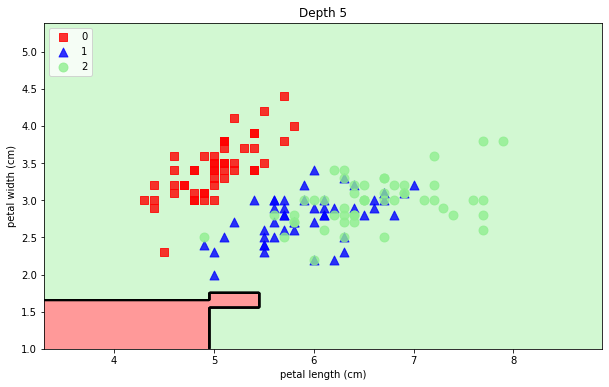

In [54]:
plt.figure(figsize=(10,6))
plot_decision_regions(X, y, dt_model5, "Depth 5")
plt.show()

- 모든 변수를 독립변수로 의사결정모형을 학습시키고 그 모형을 이용해서 트리로 시각화 합니다.

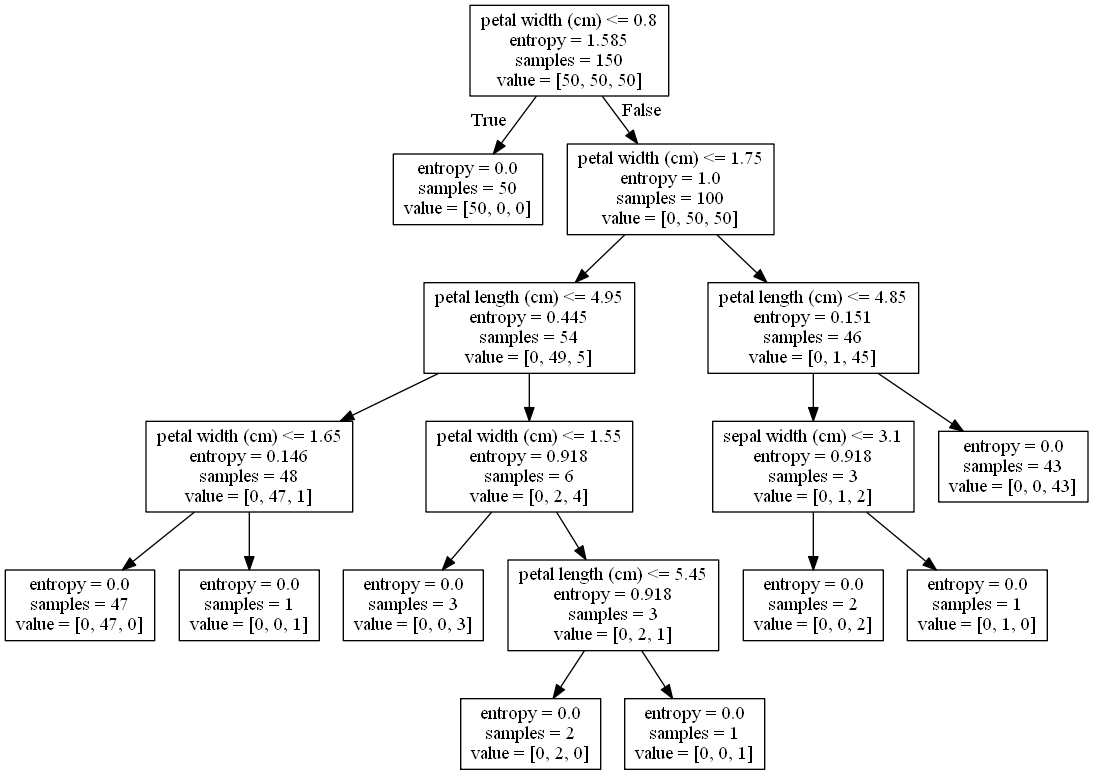

In [53]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
dt_model6 = DecisionTreeClassifier(criterion='entropy',
 max_depth=6, random_state=0).fit(X, y)

draw_decision_tree(dt_model6, feature_names=data.feature_names)

### 4.5. 판별함수 기반 모형 
- 판별 함수 기반 모형은 동일한 클래스가 모여있는 영역과  그 영역을 나누는 겨계면을 정의함 
- 경계면은 경계면으로부터의 거리를 계산하는 함수인 판별함수로 정의됨. 판별함수의 값의 부호에 따라 클래스가 나뉨

- scikit-learn에서 판별함수 기반 모형은 판별함수 값을 출력하는 decision_function() 함수를 제공함

#### 1) 퍼셉트론 : 가장 단순한 판별함수 모형 
- 직선이 경계선으로 데이터 영역을 나눔

In [32]:
from sklearn.datasets import load_iris
import numpy as np

iris= load_iris()
idx = np.in1d(iris.target, [0,2]) # 1d-arr요소가 두번 째 배열에 있는지 확인
X = iris.data[idx, 0:2]
y= iris.target[idx]

In [33]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter = 100, eta0 = 0.1, random_state=1).fit(X,y)

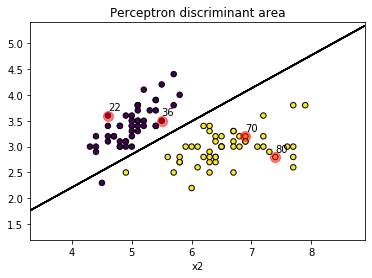

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

XX_min, XX_max = X[:,0].min() -1, X[:,0].max() +1
YY_min, YY_max = X[:,1].min() -1, X[:,1].max() +1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max,1000),
                    np.linspace(YY_min, YY_max,1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX,YY,ZZ,colors= "k")
plt.scatter( X[:,0], X[:,1], c=y, s =30,edgecolors="k", linewidths=1)

idx = [22,36,70,80]
plt.scatter(X[idx,0],X[idx,1],c='r', s =100 , alpha=0.5)
for i in idx:
    plt.annotate(i, xy= (X[i,0], X[i,1] +0.1))
plt.grid(False)
plt.title("Perceptron discriminant area")
plt.xlabel("x1")
plt.xlabel("x2")
plt.show()

- decisin_function() 함수를 이용해 데이터의 판별함수 값을 출력함

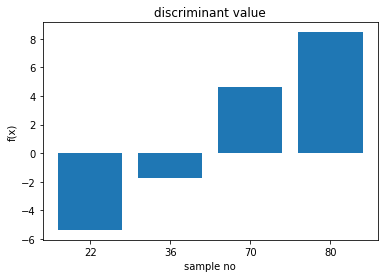

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(len(idx)),model.decision_function(X[idx]))
plt.xticks(range(len(idx)),idx)
plt.title("discriminant value")
plt.xlabel("sample no")
plt.ylabel("f(x)")
plt.show()

#### 데이터의 차원이 3차원이라면 다음과 같이 경계면 을 가지게 됨. 
- 이러한 경계면이나 경계선을 의사결정 하이퍼 플레인이라고 함

In [37]:
from sklearn.datasets import load_iris
iris= load_iris()
X = iris.data[:,:2]
y = iris.target

idx = np.logical_or(iris.target == 0, iris.target ==1)
X = iris.data[idx, :3]
y= iris.target[idx]

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

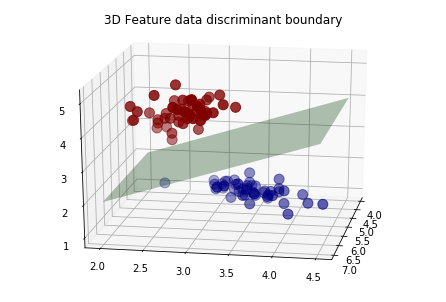

In [41]:
fig = plt.figure()
ax = Axes3D(fig, elev = 20, azim=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c=y, marker = "o",s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4,4],[7,7]]), np.array([[2,4.5],[2,4.5]]),
               np.array([[2,4],[2,4]]), color = "g", alpha=.3)
plt.title("3D Feature data discriminant boundary")
plt.show()

#### 2) 커널 SVM 
- Kernel support vector Machine 을 사용하면 다음과 같이 복잡한 형태의 경계선을 생성 할 수있음

In [43]:
import numpy  as np
xx,yy = np.meshgrid(np.linspace(-3,3,500), np.linspace(-3,3,500))
np.random.seed(0)
X = np.random.randn(300,2)
Y = np.logical_xor(X[:,0]>0,X[:,1]>0)

In [44]:
from sklearn.svm import NuSVC
model = NuSVC().fit(X,Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

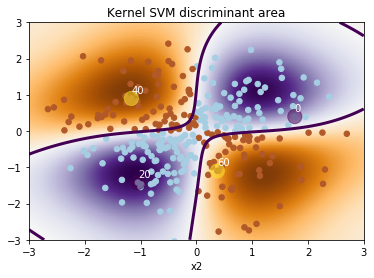

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(Z, interpolation="nearest",extent=(xx.min(),xx.max(),yy.min(),yy.max()), aspect="auto", origin="lower",cmap=plt.cm.PuOr_r)
contours = plt.contour(xx,yy,Z,levels=[0],linewidths=3)

plt.scatter(X[:,0],X[:,1], s=30,c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx,0],X[idx,1],c=Y[idx],s=200, alpha=0.5)
for i in idx:
    plt.annotate(i,xy=(X[i,0],X[i,1]+0.15),color = 'white')
plt.grid(False)
plt.axis([-3,3,-3,3])
plt.xlabel("x1")
plt.xlabel("x2")
plt.title("Kernel SVM discriminant area")
plt.show()

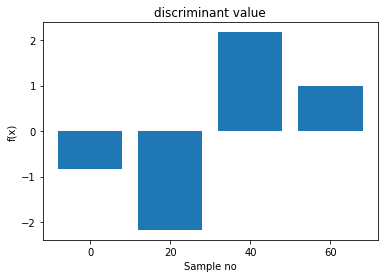

In [49]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)),idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

### 4.6. 다중 클래스 분류
- 종속변수의 클래스가 2개인 경우를 이진분류 문제라고 하며, 클래스가 3개 이상인 경우를 다중클래스 분류문제라고 함 
- 다중 클래스 분류문제는 OvO 방법 또는 OvR 방법 등을 이용하여 여러개 이전 클래스 분류문제로 변환하여 풀수 있다

#### 1) OvO (One - Vs - One)
- k개의 타겟 클래스가 존재하는 경우, 이 중 2개의 클래스 조합을 선택하여 k(k-1)/2개 이진 클래스 분류 문제를 풀고 이진 판별을 통해 가장 많은 판별값을 얻은 클래스를 선택하는 방법

In [50]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

model_ovo = OneVsOneClassifier(LogisticRegression())
model_ovo.fit(iris.data, iris.target)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   n_jobs=None)

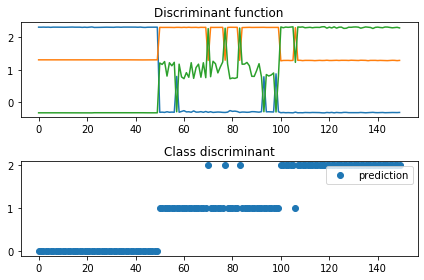

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ax1 = plt.subplot(211)
pd.DataFrame(model_ovo.decision_function(iris.data)).plot(ax=ax1,legend=False)
plt.title("Discriminant function")

ax2 = plt.subplot(212)
pd.DataFrame(model_ovo.predict(iris.data),
            columns=["prediction"]).plot(marker="o",ls="",ax=ax2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()

#### 2) OvR

- 클래스의 수가 많아지면 실행 할 이진 판별 문제의 수가 너무 많아짐. 

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(iris.data, iris.target)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

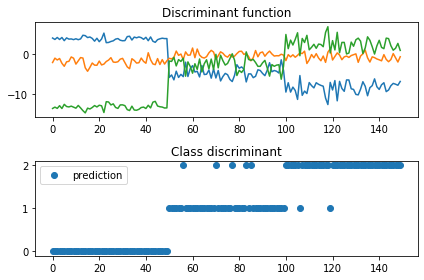

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


ax1 = plt.subplot(211)
pd.DataFrame(model_ovr.decision_function(iris.data)).plot(ax=ax1,legend=False)
plt.title("Discriminant function")

ax2 = plt.subplot(212)
pd.DataFrame(model_ovr.predict(iris.data),
            columns=["prediction"]).plot(marker="o",ls="",ax=ax2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()
